In [81]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
code='AAPL'  #change the code to any stock you want to search with the stock code
startdate = '2021-01-01'  #date format ####-##-##
enddate = '2021-4-30'  #date format ####-##-##
stock = pdr.get_data_yahoo(code,startdate,enddate)  #get data from initial to end.
print(code,'\n',stock)  #print the stocks out 
#save as excel & csv file to your machine 
stock.to_excel('D:\\Groupproject\\Stockdatas\\'+code+'.xlsx')  #change the path on ' ' to your own folder, so it can save in your machine
stock.to_csv('D:\\Groupproject\\Stockdatas\\+'+code+'.csv')  #change the path on ' ' to your own folder, so it can save in your machine


[*********************100%***********************]  1 of 1 completed
AAPL 
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  129.216919   
2021-01-05  128.889999  131.740005  128.429993  131.009995  130.814514   
2021-01-06  127.720001  131.050003  126.379997  126.599998  126.411102   
2021-01-07  128.360001  131.630005  127.860001  130.919998  130.724655   
2021-01-08  132.429993  132.630005  130.229996  132.050003  131.852966   
...                ...         ...         ...         ...         ...   
2021-04-23  132.160004  135.119995  132.160004  134.320007  134.320007   
2021-04-26  134.830002  135.059998  133.559998  134.720001  134.720001   
2021-04-27  135.009995  135.410004  134.110001  134.389999  134.389999   
2021-04-28  134.309998  135.020004  133.080002  133.580002  133.580002   
2021-04-29  136.470001  137.070007  

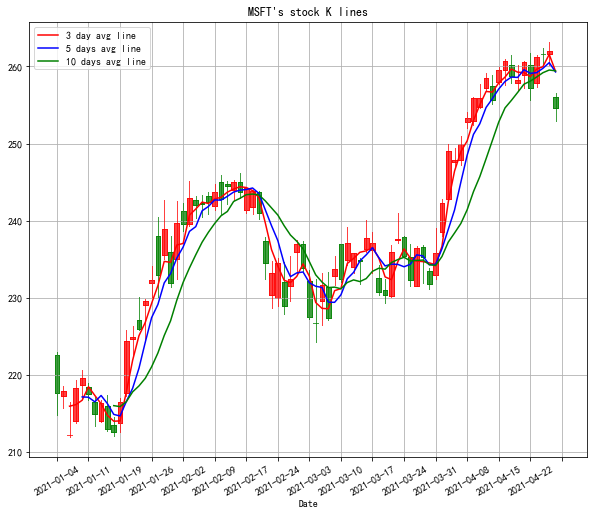

In [74]:
#imports 
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ochl
from matplotlib.ticker import MultipleLocator
import yfinance as yf

yf.pdr_override()  #cover all the price as data
stock.drop(stock.index[len(stock)-1],inplace=True)  #get all the informs from your stock
stock.to_csv('D:\\Groupproject\\Stockdatas\\AAPL.csv')  #save the stock to our machine
df = pd.read_csv('D:/Groupproject/Stockdatas/AAPL.csv',encoding='gbk',index_col=0)  #read the file from the machine
fig, ax = plt.subplots(figsize=(10, 8))  #plt size
xmajorLocator   = MultipleLocator(5)  
ax.xaxis.set_major_locator(xmajorLocator)
candlestick2_ochl(ax = ax, opens=df["Open"].values,closes=df["Close"].values, highs=df["High"].values, lows=df["Low"].values,width=0.75, colorup='red', colordown='green')
#drawing for 3 avg lines in different color
df['Close'].rolling(window=3).mean().plot(color="red",label='3 day avg line')
df['Close'].rolling(window=5).mean().plot(color="blue",label='5 days avg line')
df['Close'].rolling(window=10).mean().plot(color="green",label='10 days avg line')
plt.legend(loc='best')     #draw the graph
ax.grid(True)     #grid line
plt.title("%1s's stock K lines"%code)  #title for the stock
plt.rcParams['font.sans-serif']=['SimHei']
plt.setp(plt.gca().get_xticklabels(), rotation=30) 
plt.show()

In [79]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# getting data from the machine
sfile = 'MSFT.csv'
origDf = pd.read_csv('D:\\Groupproject\\Stockdatas\\AAPL.csv',encoding='gbk')  #original Dataframe
df = origDf[['Close', 'High', 'Low','Open' ,'Volume']]  #Predicting Dataframe
featureData = df[['Open', 'High', 'Volume','Low']]  #Datas
#specifics the values
feature = featureData.values
target = np.array(df['Close'])

In [62]:
feature_train, feature_test, target_train ,target_test = train_test_split(feature,target,test_size=0.05)
pridectedDays = int(math.ceil(0.05 * len(origDf)))     # predict days
lrTool = LinearRegression()
lrTool.fit(feature_train,target_train)
predictByTest = lrTool.predict(feature_test)  # Test

In [64]:
index=0

while index < len(origDf) - pridectedDays:
        df.ix[index,'predictedVal']=origDf.ix[index,'Close']
        df.ix[index,'Date']=origDf.ix[index,'Date']
        index = index+1
        predictedCnt=0

# while predictedCnt<pridectedDays:
#     try:
#         df.ix[index,'predictedVal']=predictByTest[predictedCnt]
#         df.ix[index,'Date']=origDf.ix[index,'Date']
#         predictedCnt=predictedCnt+1
#         index=index+1
#     except AttributeError:
#         print('AttributeError')

AttributeError: 'DataFrame' object has no attribute 'ix'

In [ ]:
while predictedCnt<pridectedDays:
    try:
        df.ix[index,'predictedVal']=predictByTest[predictedCnt]
        df.ix[index,'Date']=origDf.ix[index,'Date']
        predictedCnt=predictedCnt+1
        index=index+1
    except AttributeError:
        print('AttributeError')

In [ ]:
plt.figure()
df['predictedVal'].plot(color="red",label='predicted Data')
df['Close'].plot(color="blue",label='Real Data')
plt.legend(loc='best')  #draw
major_index=df.index[df.index%10==0]  #set x title
major_xtics=df['Date'][df.index%10==0]  #set x titl
plt.xticks(major_index,major_xtics)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.grid(linestyle='-.')
plt.show()
